### File to analyze the self created dataset

In [1]:
from src.data.dataloader import VesselCaptureDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set font and fontsize globally
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 11

In [2]:
data_dir = "data/processed"
dataset = VesselCaptureDataset(data_dir)

In [3]:
print("Number of samples:", len(dataset))

Number of samples: 5451


In [4]:
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

Average vessel volume: 400.22
Average liquid volume: 184.10


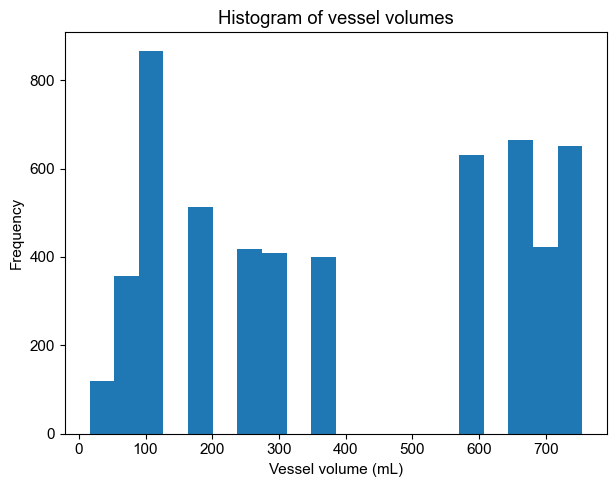

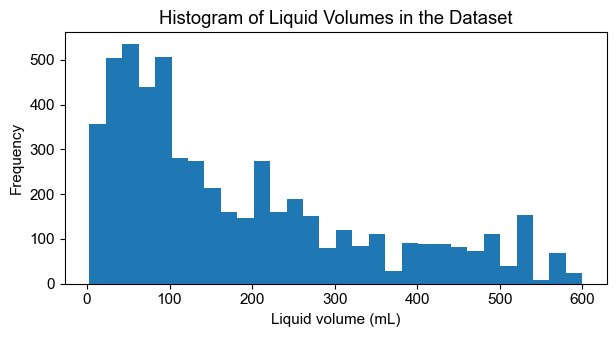

In [8]:
# get average of all vessel volumes
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []

for i, data in enumerate(data_loader):
    vessel_vol = data["vol_vessel"]
    # store value for each sample for histogram
    vessel_vol_list.append(vessel_vol.item())
    vessel_vol_sum += vessel_vol.item()
    liquid_vol = data["vol_liquid"]
    # store value for each sample for histogram
    liquid_vol_list.append(liquid_vol.item())
    liquid_vol_sum += liquid_vol.item()

vessel_vol_avg = vessel_vol_sum / len(dataset)
liquid_vol_avg = liquid_vol_sum / len(dataset)

# print results with 2 decimal places
print("Average vessel volume:", "{:.2f}".format(vessel_vol_avg))
print("Average liquid volume:", "{:.2f}".format(liquid_vol_avg))

# plot histogram of vessel volumes
plt.figure(figsize=(6.3, 5))
plt.hist(vessel_vol_list, bins=20)
plt.title("Histogram of vessel volumes")
plt.xlabel("Vessel volume (mL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# plot histogram of liquid volumes
plt.figure(figsize=(6.3, 3.5))
plt.hist(liquid_vol_list, bins=30)
plt.title("Histogram of Liquid Volumes in the Dataset")
plt.xlabel("Liquid volume (mL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("output/histogram_liquid_volume.png", format="png", dpi=1200)
plt.show()

c:\Users\apo_n\miniconda3\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\apo_n\miniconda3\envs\thesis\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\apo_n\Documents\GitHub\thesis\volume_estimation\src\data\dataloader.py:128: RuntimeWarning: divide by zero encountered in divide
  liquid_depth_normalized[mask] = (liquid_depth[mask] - mean + 10) / std


Gibco_500mL : 652
Pyrex_100mL : 530
StorageBottle_500mL : 423
Cell_Flask_160mL : 417
Cell_Flask_400mL : 665
Tube_50mL : 357
Gibco_125mL : 512
Duran_100mL : 335
Duran_500mL : 631
Duran_250mL : 409
StorageBottle_250mL : 401
Tube_15mL : 119


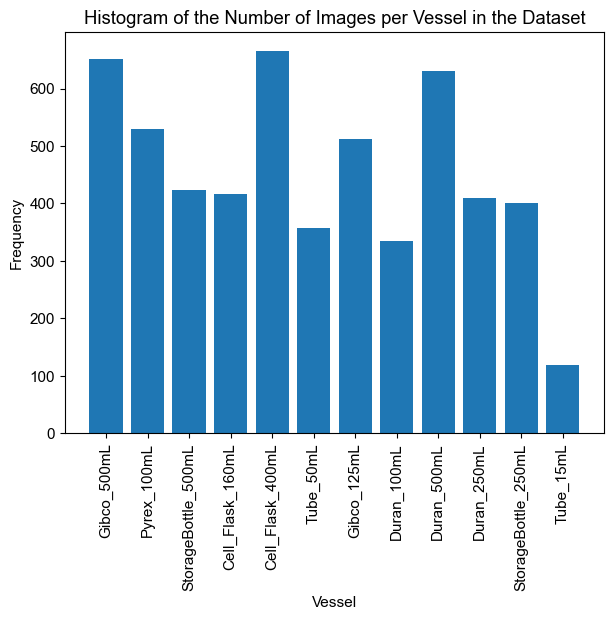

In [6]:
from collections import Counter

vessel_names = []
for i, data in enumerate(data_loader):
    vessel_name = data["vessel_name"]
    vessel_names.append(str(vessel_name))
    # print(vessel_names)

# Count the occurrences of each vessel name
name_counts = Counter(vessel_names)

# Extract unique vessel names and their counts
unique_vessel_names = [
    name[2:-2] for name in name_counts.keys()
]  # Remove brackets and quotes
vessel_name_counts = list(name_counts.values())

# print value for each vessel name
for i in range(len(unique_vessel_names)):
    print(unique_vessel_names[i], ":", vessel_name_counts[i])


# Plot histogram of vessel names
# bar without brackets for names
plt.figure(figsize=(6.3, 5))
plt.bar(unique_vessel_names, vessel_name_counts)
plt.title("Histogram of the Number of Images per Vessel in the Dataset")
plt.xlabel("Vessel")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig("output/histogram_vessel_names.png", format="png", dpi=1200)
plt.show()

In [9]:
for name in unique_vessel_names:
    print(name)

Duran_100mL
Cell_Flask_160mL
Cell_Flask_400mL
Tube_50mL
StorageBottle_500mL
Pyrex_100mL
StorageBottle_250mL
Tube_15mL
Gibco_500mL
Gibco_125mL
Duran_500mL
Duran_250mL


Vessel name: Duran_100mL
Average liquid volume for Duran_100mL : 58.01
Vessel name: Cell_Flask_160mL
Average liquid volume for Cell_Flask_160mL : 124.86
Vessel name: Cell_Flask_400mL
Average liquid volume for Cell_Flask_400mL : 292.30
Vessel name: Tube_50mL
Average liquid volume for Tube_50mL : 30.78
Vessel name: StorageBottle_500mL
Average liquid volume for StorageBottle_500mL : 280.57
Vessel name: Pyrex_100mL
Average liquid volume for Pyrex_100mL : 59.59
Vessel name: StorageBottle_250mL
Average liquid volume for StorageBottle_250mL : 183.11
Vessel name: Tube_15mL
Average liquid volume for Tube_15mL : 9.44
Vessel name: Gibco_500mL
Average liquid volume for Gibco_500mL : 320.61
Vessel name: Gibco_125mL
Average liquid volume for Gibco_125mL : 85.59
Vessel name: Duran_500mL
Average liquid volume for Duran_500mL : 290.36
Vessel name: Duran_250mL
Average liquid volume for Duran_250mL : 160.80


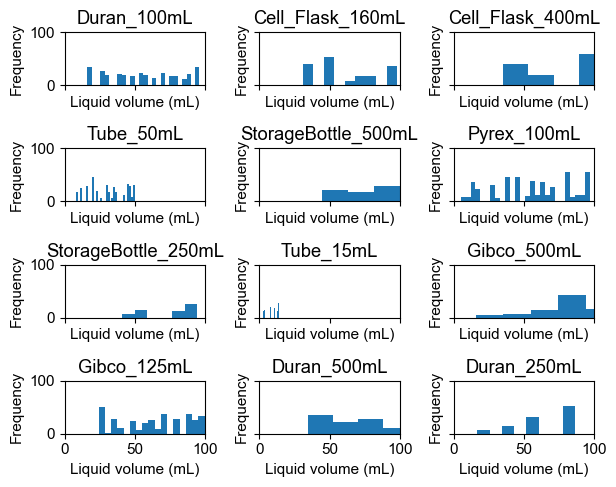

In [14]:
# get average volume per vessel name
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []
vessel_name_list = []

# unique_vessel_names
# create subplots for each unique vessel name
fig, axs = plt.subplots(4, 3, figsize=(6.3, 5), sharex=True, sharey=True)
axs = axs.ravel()

for name in unique_vessel_names:
    print("Vessel name:", name)
    # load samples for vessel name
    for i, data in enumerate(data_loader):
        vessel_name = data["vessel_name"][0]

        # print("Vessel name from data:", vessel_name)

        if str(vessel_name) == str(name):
            # print("Sample", i)
            liquid_vol = data["vol_liquid"]
            # store value for each sample for histogram
            liquid_vol_list.append(liquid_vol.item())
            liquid_vol_sum += liquid_vol.item()

    liquid_vol_avg = liquid_vol_sum / len(liquid_vol_list)
    print("Average liquid volume for", name, ":", "{:.2f}".format(liquid_vol_avg))

    # plot histogram of liquid volumes
    axs[unique_vessel_names.index(name)].hist(liquid_vol_list, bins=30)
    axs[unique_vessel_names.index(name)].set_title(name)
    axs[unique_vessel_names.index(name)].set_xlabel("Liquid volume (mL)")
    axs[unique_vessel_names.index(name)].set_ylabel("Frequency")
    axs[unique_vessel_names.index(name)].set_xlim([0, 100])
    axs[unique_vessel_names.index(name)].set_ylim([0, 100])

    # reset values
    liquid_vol_sum = 0
    liquid_vol_list = []

plt.tight_layout()
plt.savefig("output/histogram_liquid_volume_per_vessel.png", format="png", dpi=1200)
plt.show()

In [9]:
vessel_depth_path = (
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_EmptyVessel_Depth_segmented.npy"
)
vessel_depth = np.load(vessel_depth_path).astype(np.float32)

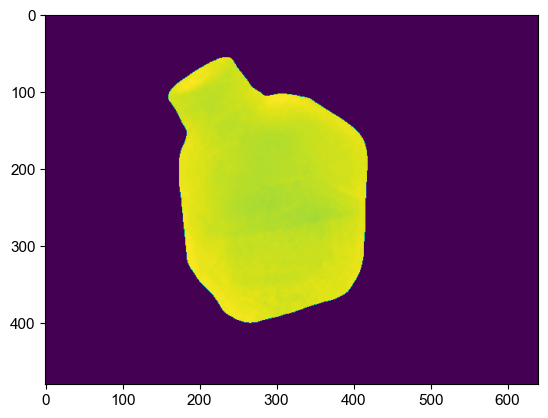

In [10]:
# visualize vessel depth image
plt.imshow(vessel_depth)

(-0.5, 639.5, 479.5, -0.5)

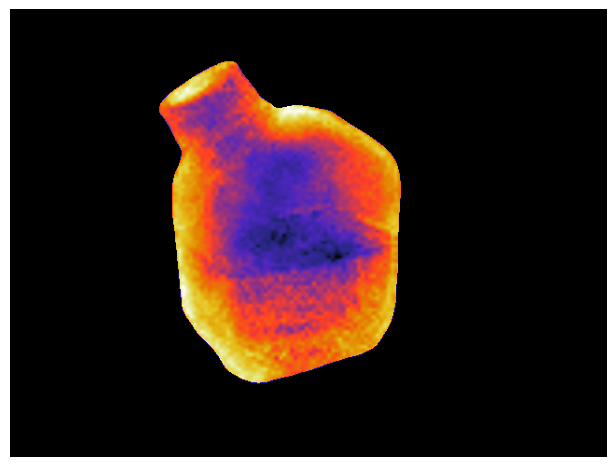

In [12]:
# copy depth map for visualization
tmIm = vessel_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

plt.figure(figsize=(6.3, 5))
# turn off axis
plt.axis("off")
# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
plt.tight_layout()
plt.savefig("output/depth_map.png", format="png", dpi=1200)
# turn off axis
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

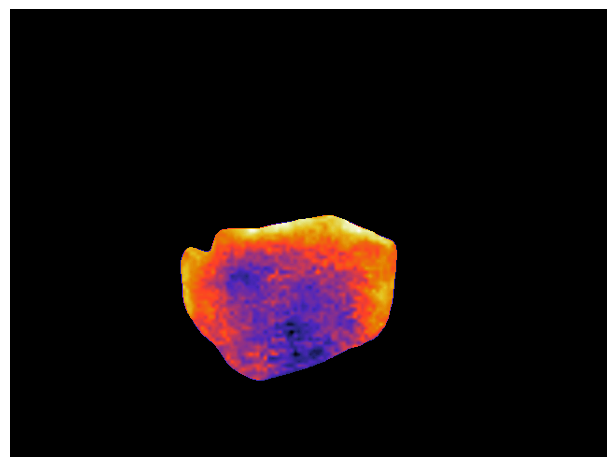

In [14]:
liquid_depth_path = (
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_ContentDepth_segmented.npy"
)
liquid_depth = np.load(liquid_depth_path).astype(np.float32)

# copy depth map for visualization
tmIm = liquid_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

plt.figure(figsize=(6.3, 5))
# turn off axis
plt.axis("off")
# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
plt.tight_layout()
plt.savefig("output/depth_map_liquid.png", format="png", dpi=1200)
# turn off axis
plt.axis("off")

In [16]:
# load vessel mask
vessel_mask = np.load(
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_VesselMask.npy"
).astype(np.float32)

depth_map = np.load(
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_DepthMap.npy"
).astype(np.float32)

# multiply depth map with vessel mask
vessel_depth_masked = depth_map * vessel_mask

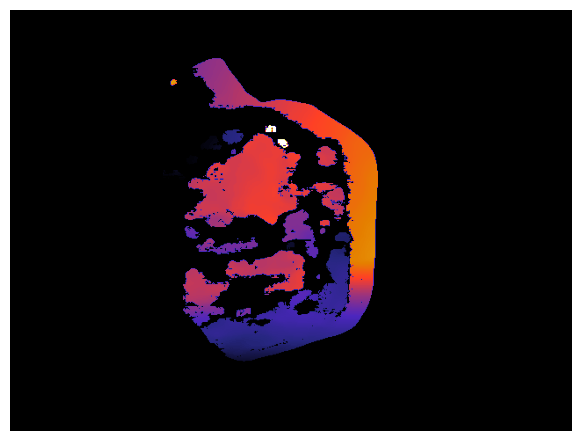

In [29]:
# copy depth map for visualization
tmIm = vessel_depth_masked.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# set values above 500 to 500
tmIm[tmIm > 500] = 500

# normalize tmIm to values between 0-255

# find min and max values for non zero values
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.imshow(tmIm, cmap="CMRmap")
plt.tight_layout()
# turn off axis
plt.axis("off")
plt.savefig("output/depth_map_masked.png", format="png", dpi=1200)

In [30]:
# load vessel mask
vessel_mask = np.load(
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_ContentMaskClean.npy"
).astype(np.float32)

depth_map = np.load(
    "data/processed/Gibco_500mL_358ml_1105_2306/Input_DepthMap.npy"
).astype(np.float32)

# multiply depth map with vessel mask
vessel_depth_masked = depth_map * vessel_mask

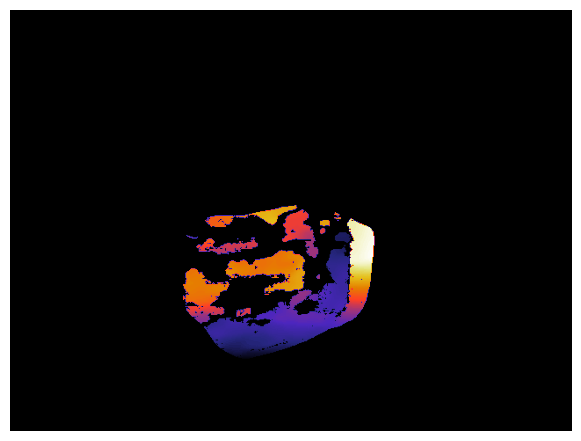

In [31]:
# copy depth map for visualization
tmIm = vessel_depth_masked.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# set values above 500 to 500
tmIm[tmIm > 500] = 500

# normalize tmIm to values between 0-255

# find min and max values for non zero values
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.imshow(tmIm, cmap="CMRmap")
plt.tight_layout()
# turn off axis
plt.axis("off")
plt.savefig("output/depth_map_masked_liquid.png", format="png", dpi=1200)

## Get color distribution

In [7]:
# get average volume per vessel name
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []
vessel_name_list = []
green_samples = 0
red_samples = 0
blue_samples = 0

for name in unique_vessel_names:
    print("Vessel name:", name)
    # load samples for vessel name
    for i, data in enumerate(data_loader):
        vessel_name = data["vessel_name"][0]

        if str(vessel_name) == str(name):
            color = data["color"][0]
            # store value for each sample for histogram
            if color == "green":
                green_samples += 1
            if color == "red":
                red_samples += 1
            if color == "blue":
                blue_samples += 1

    print("Green samples", name, ":", green_samples)
    print("Red samples:", name, ":", red_samples)
    print("Blue samples:", name, ":", blue_samples)

    # reset values
    green_samples = 0
    red_samples = 0
    blue_samples = 0

Vessel name: Gibco_500mL
Green samples Gibco_500mL : 174
Red samples: Gibco_500mL : 371
Blue samples: Gibco_500mL : 107
Vessel name: Pyrex_100mL
Green samples Pyrex_100mL : 138
Red samples: Pyrex_100mL : 314
Blue samples: Pyrex_100mL : 78
Vessel name: StorageBottle_500mL
Green samples StorageBottle_500mL : 95
Red samples: StorageBottle_500mL : 328
Blue samples: StorageBottle_500mL : 0
Vessel name: Cell_Flask_160mL
Green samples Cell_Flask_160mL : 167
Red samples: Cell_Flask_160mL : 170
Blue samples: Cell_Flask_160mL : 80
Vessel name: Cell_Flask_400mL
Green samples Cell_Flask_400mL : 299
Red samples: Cell_Flask_400mL : 228
Blue samples: Cell_Flask_400mL : 138
Vessel name: Tube_50mL
Green samples Tube_50mL : 117
Red samples: Tube_50mL : 189
Blue samples: Tube_50mL : 51
Vessel name: Gibco_125mL
Green samples Gibco_125mL : 153
Red samples: Gibco_125mL : 306
Blue samples: Gibco_125mL : 53
Vessel name: Duran_100mL
Green samples Duran_100mL : 165
Red samples: Duran_100mL : 170
Blue samples: D